### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5
### Дисциплина: Интеллектуальный анализ данных

## Москва 2022

### Вариант № 20

# 1.Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
array = pd.read_csv( "http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data", header=None, sep='  ', error_bad_lines=False ).drop([0],axis=1)

# 2.Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс.

In [2]:
array = array.replace('?', np.NaN)
print (array[9].isna().sum())
array[9].value_counts()

0


CYT    463
NUC    424
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: 9, dtype: int64

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
array[9]=le.fit_transform(array[9])

In [4]:
array[9]=array[9].apply(lambda x:x%2 if x else x)

# 3.Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.

In [5]:
array.dtypes

1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9      int64
dtype: object

In [6]:
array = array.replace('?', np.NaN)
print (array.isna().sum().sum())

0


# 4.Выполните стандартизацию признаков набора данных.

In [7]:
X = array.drop([9],axis=1)
y = array[9].astype(int)
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X = pd.DataFrame(standardScaler.transform(X))

# 5.Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений

In [8]:
X.head()

,0,1,2,3,4,5,6,7
0,0.579397,0.885693,-0.344092,-0.956158,-0.097756,-0.0993,-0.349598,-0.529986
1,-0.512788,1.370019,-0.228771,0.066265,-0.097756,-0.0993,0.517945,-0.529986
2,1.016271,0.966414,-0.113450,-0.810097,-0.097756,-0.0993,0.517945,-0.529986
3,0.579397,-0.486564,0.809119,-0.956158,-0.097756,-0.0993,0.691453,-0.529986
4,-0.585600,-0.486564,-0.228771,2.038082,-0.097756,-0.0993,-0.349598,-0.529986


In [9]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.16636991 0.15159466 0.20985102 0.16782155 0.00606047 0.00771111
 0.13579308 0.15479821]


In [10]:
X = X[[2,3]]

# 6.Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных

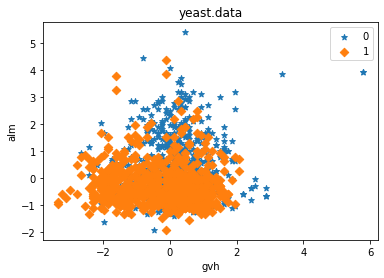

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X.values[y == 0, 0], X.values[y == 0, 1], marker='*',label='0')
plt.scatter(X.values[y == 1, 0], X.values[y == 1, 1], marker='D',label='1')
plt.xlabel('gvh')
plt.ylabel('alm')
plt.title('yeast.data')
plt.legend()

# 7.Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=666)
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train);
knn_clf2 = KNeighborsClassifier(n_neighbors=5)
knn_clf2.fit(X_train, y_train);
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

# 8.Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  

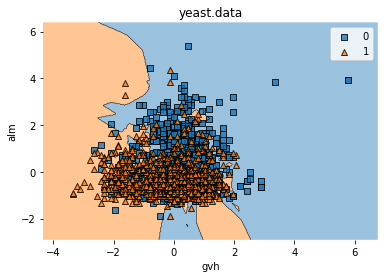

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,knn_clf)
plt.xlabel('gvh')
plt.ylabel('alm')
plt.title('yeast.data')
plt.legend()

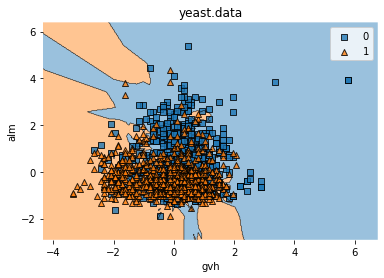

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,knn_clf2)
plt.xlabel('gvh')
plt.ylabel('alm')
plt.title('yeast.data')
plt.legend()

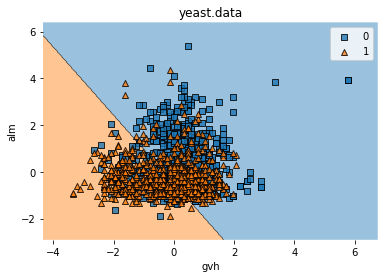

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,lda)
plt.xlabel('gvh')
plt.ylabel('alm')
plt.title('yeast.data')
plt.legend()

# 9.Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.  

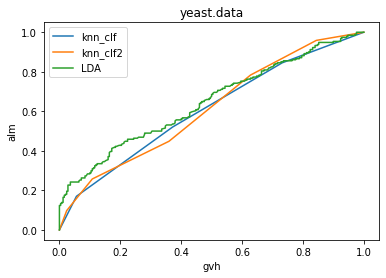

In [16]:
from sklearn.metrics import roc_curve
fprs0, tprs0, thresholds = roc_curve(y_test, knn_clf.predict_proba(X_test)[:,1])
fprs1, tprs1, thresholds = roc_curve(y_test, knn_clf2.predict_proba(X_test)[:,1])
fprs2, tprs2, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
plt.plot(fprs0, tprs0, label='knn_clf');
plt.plot(fprs1, tprs1, label='knn_clf2');
plt.plot(fprs2, tprs2, label='LDA');
plt.xlabel('gvh')
plt.ylabel('alm')
plt.title('yeast.data')
plt.legend()

# 10.Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п.9

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:,1])

0.6070515463917526

In [18]:
roc_auc_score(y_test, knn_clf2.predict_proba(X_test)[:,1])

0.6111237113402063

In [19]:
roc_auc_score(y_test, lda.predict_proba(X_test)[:,1])

0.6458659793814433

-       классификатор LDA
